In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('../data/weld_data_processed.csv')

In [97]:
df.head()

,C,Si,Mn,S,P,Ni,Cr,Mo,V,Cu,...,Weld_type,PWHT_temp,PWHT_time,Yield_strength,UTS,Elongation,Reduction_area,Charpy_temp,Charpy_impact,Weld_ID
0,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,MMA,250.0,14.0,392.0,466.0,31.9,80.6,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-28.0,100.0,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,MMA,580.0,2.0,370.0,456.0,35.2,80.6,-38.0,100.0,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,0.0,0.0,0.0,0.0,...,MMA,250.0,14.0,413.0,498.0,31.2,80.6,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,0.0,0.0,0.0,0.0,...,MMA,0.0,0.0,NaN,NaN,NaN,NaN,-48.0,100.0,Evans-Ni/CMn-1990/1991-0Bawch


In [98]:
df.columns

Index(['C', 'Si', 'Mn', 'S', 'P', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 'Co', 'W', 'O',
       'Ti', 'N', 'Al', 'B', 'Nb', 'Sn', 'As', 'Sb', 'Current', 'Voltage',
       'AC_DC', 'Electrode_polarity', 'Heat_input', 'Interpass_temp',
       'Weld_type', 'PWHT_temp', 'PWHT_time', 'Yield_strength', 'UTS',
       'Elongation', 'Reduction_area', 'Charpy_temp', 'Charpy_impact',
       'Weld_ID'],
      dtype='object')

In [99]:
df_comp_chimique = df[['C', 'Si', 'Mn', 'S', 'P', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 'Co', 'W', 'O','Ti', 'N', 'Al', 'B', 'Nb', 'Sn', 'As', 'Sb' ]]
df_welding_tests = df[['Yield_strength', 'UTS','Elongation', 'Reduction_area', 'Charpy_temp', 'Charpy_impact']]
df_welding_params = df[['Current', 'Voltage','AC_DC', 'Electrode_polarity', 'Heat_input', 'Interpass_temp','Weld_type', 'PWHT_temp', 'PWHT_time']]

## Analyse des Valeurs Manquantes

Étude détaillée de la distribution des données manquantes pour identifier les patterns et décider de la meilleure stratégie de nettoyage.

In [101]:
# Analyse globale des valeurs manquantes
missing_data = pd.concat([df_comp_chimique, df_welding_tests, df_welding_params], axis=1)
missing_counts = missing_data.isnull().sum()
missing_percent = (missing_counts / len(missing_data)) * 100

missing_df = pd.DataFrame({
    'Colonnes': missing_counts.index,
    'Manquantes': missing_counts.values,
    'Pourcentage': missing_percent.values
}).sort_values('Manquantes', ascending=False)

print(missing_df.to_string(index=False))
print(f"\nTotal de lignes: {len(missing_data)}")
print(f"Nombre de colonnes avec données manquantes: {(missing_counts > 0).sum()}")
print(f"Nombre de colonnes complètes: {(missing_counts == 0).sum()}")

          Colonnes  Manquantes  Pourcentage
        Elongation         952    57.627119
    Reduction_area         947    57.324455
               UTS         914    55.326877
    Yield_strength         872    52.784504
     Charpy_impact         773    46.791768
       Charpy_temp         773    46.791768
           Current         248    15.012107
           Voltage         248    15.012107
             AC_DC         215    13.014528
Electrode_polarity         156     9.443099
         PWHT_time          13     0.786925
         PWHT_temp          13     0.786925
                Si           0     0.000000
        Heat_input           0     0.000000
    Interpass_temp           0     0.000000
         Weld_type           0     0.000000
                Sb           0     0.000000
                As           0     0.000000
                 C           0     0.000000
                Nb           0     0.000000
                 V           0     0.000000
                Mn           0  

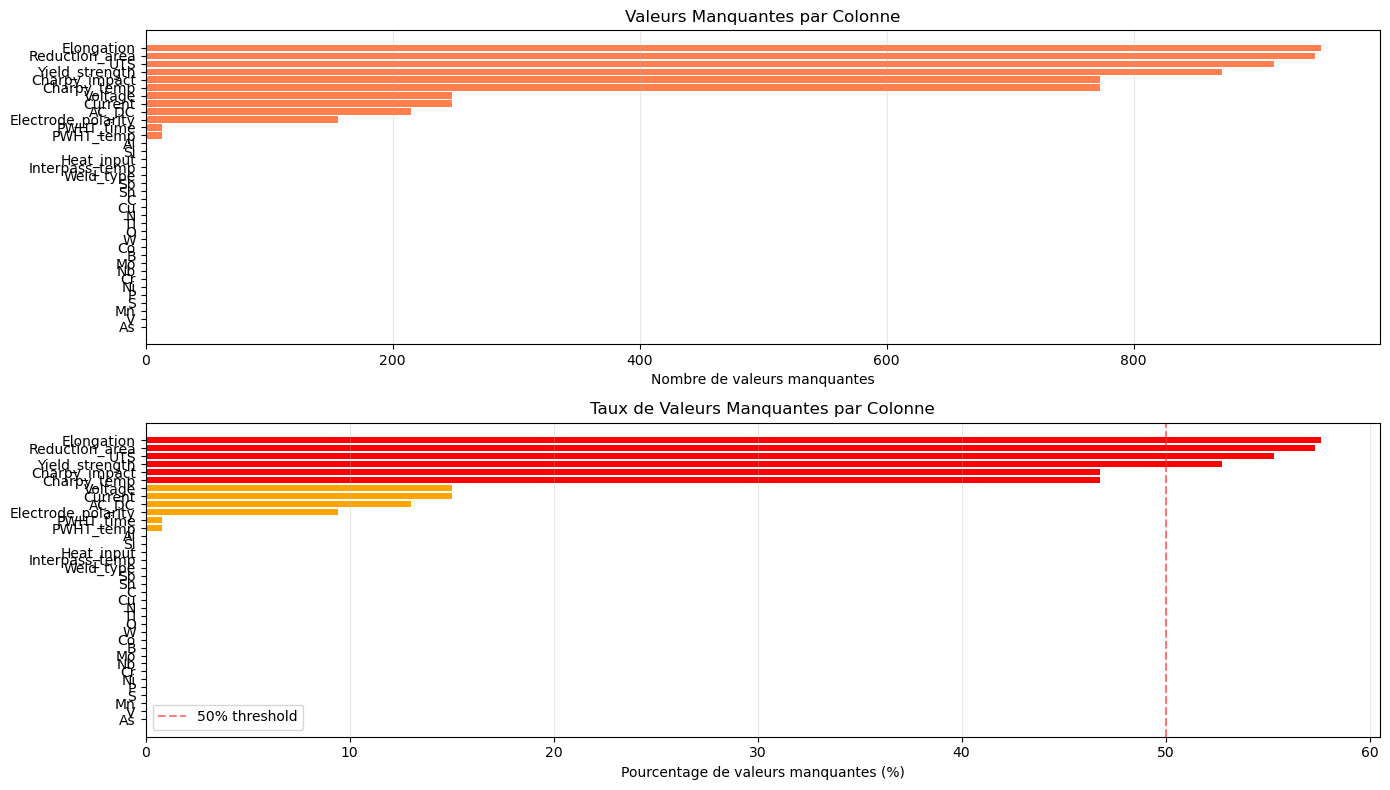

In [102]:
# Visualisation des valeurs manquantes par colonne
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Graphique 1: Nombre de valeurs manquantes
missing_sorted = missing_df.sort_values('Manquantes', ascending=True)
axes[0].barh(missing_sorted['Colonnes'], missing_sorted['Manquantes'], color='coral')
axes[0].set_xlabel('Nombre de valeurs manquantes')
axes[0].set_title('Valeurs Manquantes par Colonne')
axes[0].grid(True, alpha=0.3, axis='x')

# Graphique 2: Pourcentage de valeurs manquantes
missing_sorted_pct = missing_df.sort_values('Pourcentage', ascending=True)
colors = ['green' if x == 0 else 'orange' if x < 20 else 'red' for x in missing_sorted_pct['Pourcentage']]
axes[1].barh(missing_sorted_pct['Colonnes'], missing_sorted_pct['Pourcentage'], color=colors)
axes[1].set_xlabel('Pourcentage de valeurs manquantes (%)')
axes[1].set_title('Taux de Valeurs Manquantes par Colonne')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

In [103]:
# Analyse par LIGNES: Combien de valeurs manquantes par ligne
missing_per_row = missing_data.isnull().sum(axis=1)

print(f"Nombre de lignes avec 0 valeurs manquantes: {(missing_per_row == 0).sum()}")
print(f"Nombre de lignes avec 1+ valeurs manquantes: {(missing_per_row > 0).sum()}")
print(f"\nDistribution des valeurs manquantes par ligne:")
print(missing_per_row.value_counts().sort_index())
print(f"\nMoyenne de valeurs manquantes par ligne: {missing_per_row.mean():.2f}")
print(f"Valeur max de valeurs manquantes sur une ligne: {missing_per_row.max()}")

Nombre de lignes avec 0 valeurs manquantes: 134
Nombre de lignes avec 1+ valeurs manquantes: 1518

Distribution des valeurs manquantes par ligne:
0    134
1     10
2    356
3     85
4    707
5     69
6    176
7      2
8    113
Name: count, dtype: int64

Moyenne de valeurs manquantes par ligne: 3.71
Valeur max de valeurs manquantes sur une ligne: 8


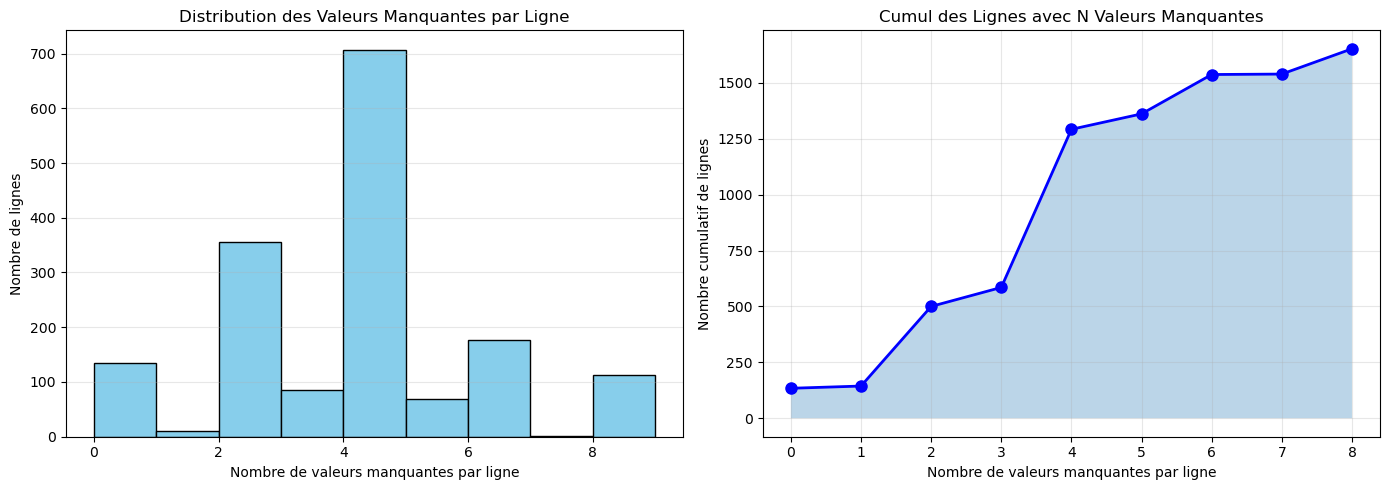

In [104]:
# Visualisation de la distribution des valeurs manquantes par ligne
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(missing_per_row, bins=range(0, missing_per_row.max()+2), edgecolor='black', color='skyblue')
axes[0].set_xlabel('Nombre de valeurs manquantes par ligne')
axes[0].set_ylabel('Nombre de lignes')
axes[0].set_title('Distribution des Valeurs Manquantes par Ligne')
axes[0].grid(True, alpha=0.3, axis='y')

# Graphique cumulatif
value_counts = missing_per_row.value_counts().sort_index()
cumulative = value_counts.cumsum()
axes[1].plot(value_counts.index, cumulative.values, 'bo-', linewidth=2, markersize=8)
axes[1].fill_between(value_counts.index, cumulative.values, alpha=0.3)
axes[1].set_xlabel('Nombre de valeurs manquantes par ligne')
axes[1].set_ylabel('Nombre cumulatif de lignes')
axes[1].set_title('Cumul des Lignes avec N Valeurs Manquantes')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

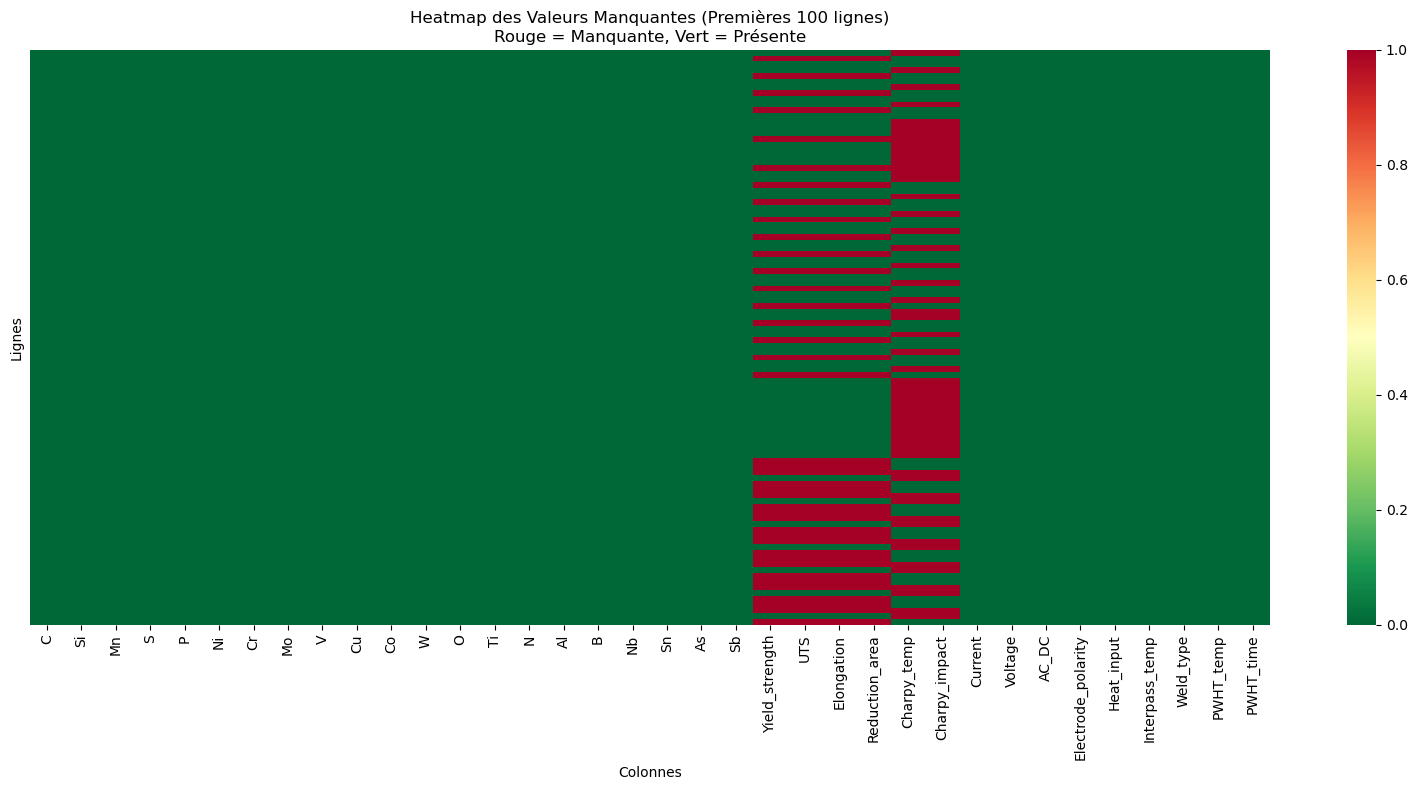

In [105]:
# Heatmap pour visualiser la position des valeurs manquantes
sample_size = min(100, len(missing_data))
missing_matrix = missing_data.iloc[:sample_size].isnull().astype(int)

plt.figure(figsize=(16, 8))
sns.heatmap(missing_matrix, cbar=True, cmap='RdYlGn_r', 
            xticklabels=True, yticklabels=False)
plt.title(f'Heatmap des Valeurs Manquantes (Premières {sample_size} lignes)\nRouge = Manquante, Vert = Présente')
plt.xlabel('Colonnes')
plt.ylabel('Lignes')
plt.tight_layout()
plt.show()

In [106]:
# Analyse de corrélation entre colonnes manquantes
# Voir si certaines colonnes ont leurs valeurs manquantes au même endroit

# Créer une matrice binaire (1 si manquante, 0 sinon)
missing_matrix_full = missing_data.isnull().astype(int)
missing_corr = missing_matrix_full.corr()

# Trouver les paires de colonnes avec forte corrélation de manquants
print("\nPaires de colonnes avec forte corrélation de valeurs manquantes (> 0.5):")
strong_corr_pairs = []
for i in range(len(missing_corr.columns)):
    for j in range(i+1, len(missing_corr.columns)):
        corr_value = missing_corr.iloc[i, j]
        if corr_value > 0.5:
            strong_corr_pairs.append({
                'Col1': missing_corr.columns[i],
                'Col2': missing_corr.columns[j],
                'Corrélation': corr_value
            })

if strong_corr_pairs:
    strong_corr_df = pd.DataFrame(strong_corr_pairs).sort_values('Corrélation', ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("Aucune paire avec corrélation > 0.5")


Paires de colonnes avec forte corrélation de valeurs manquantes (> 0.5):
          Col1               Col2  Corrélation
   Charpy_temp      Charpy_impact     1.000000
       Current            Voltage     1.000000
     PWHT_temp          PWHT_time     1.000000
    Elongation     Reduction_area     0.956677
Yield_strength                UTS     0.891558
Yield_strength     Reduction_area     0.890221
Yield_strength         Elongation     0.884570
           UTS     Reduction_area     0.876508
           UTS         Elongation     0.870503
         AC_DC Electrode_polarity     0.834845
       Current Electrode_polarity     0.768341
       Voltage Electrode_polarity     0.768341
       Current              AC_DC     0.623170
       Voltage              AC_DC     0.623170


In [107]:
# Stratégies de nettoyage et impact

strategies = {}

# Stratégie 1: Suppression simple (dropna)
strategy1 = missing_data.dropna()
strategies['Suppression complète (dropna)'] = {
    'Lignes restantes': len(strategy1),
    'Pourcentage conservé': f"{(len(strategy1)/len(missing_data)*100):.1f}%",
    'Lignes supprimées': len(missing_data) - len(strategy1)
}

# Stratégie 2: Supprimer colonnes avec >50% manquantes, puis dropna
cols_to_keep_50 = missing_df[missing_df['Pourcentage'] <= 50]['Colonnes'].tolist()
strategy2 = missing_data[cols_to_keep_50].dropna()
strategies['Colonnes >50% + dropna'] = {
    'Lignes restantes': len(strategy2),
    'Pourcentage conservé': f"{(len(strategy2)/len(missing_data)*100):.1f}%",
    'Colonnes gardées': len(cols_to_keep_50),
    'Colonnes supprimées': len(missing_data.columns) - len(cols_to_keep_50)
}

# Stratégie 3: Supprimer colonnes avec >20% manquantes, puis dropna
cols_to_keep_20 = missing_df[missing_df['Pourcentage'] <= 20]['Colonnes'].tolist()
strategy3 = missing_data[cols_to_keep_20].dropna()
strategies['Colonnes >20% + dropna'] = {
    'Lignes restantes': len(strategy3),
    'Pourcentage conservé': f"{(len(strategy3)/len(missing_data)*100):.1f}%",
    'Colonnes gardées': len(cols_to_keep_20),
    'Colonnes supprimées': len(missing_data.columns) - len(cols_to_keep_20)
}

for strategy_name, stats in strategies.items():
    print(f"\n{strategy_name}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")


Suppression complète (dropna):
  Lignes restantes: 134
  Pourcentage conservé: 8.1%
  Lignes supprimées: 1518

Colonnes >50% + dropna:
  Lignes restantes: 753
  Pourcentage conservé: 45.6%
  Colonnes gardées: 32
  Colonnes supprimées: 4

Colonnes >20% + dropna:
  Lignes restantes: 1332
  Pourcentage conservé: 80.6%
  Colonnes gardées: 30
  Colonnes supprimées: 6


## Analyse Exploratoire : Composition Chimique + Paramètres de Soudage → Qualité

Objectif : comprendre comment la composition chimique ET les paramètres de soudage influencent la qualité des soudures.

In [86]:

# Combiner : composition chimique + paramètres de soudage + qualité
X_all = pd.concat([df_comp_chimique, df_welding_params], axis=1)
y_quality = df_welding_tests[['Charpy_impact']]  # Cible : qualité

# Afficher les infos
print(f"\nDimensions des données:")
print(f"  • Composition chimique: {df_comp_chimique.shape[1]} colonnes (21 éléments)")
print(f"  • Paramètres de soudage: {df_welding_params.shape[1]} colonnes")
print(f"  • Cible (Charpy_impact): 1 colonne")
print(f"  • Total features: {X_all.shape[1]} colonnes")
print(f"  • Total lignes: {len(X_all)} lignes")

# Analyser les valeurs manquantes
missing_all = pd.concat([X_all, y_quality], axis=1)
print(f"\nValeurs manquantes:")
print(f"  • Lignes avec ≥1 valeur manquante: {missing_all.isnull().any(axis=1).sum()} / {len(missing_all)}")
print(f"  • Lignes complètes: {(~missing_all.isnull().any(axis=1)).sum()}")

# Stratégie simple : garder seulement les lignes complètes pour l'exploration
df_complete = missing_all.dropna()
print(f"\nAprès suppression des lignes incomplètes: {len(df_complete)} lignes ({len(df_complete)/len(X_all)*100:.1f}%)")

# Séparer les features et la cible
X_complete = df_complete.drop('Charpy_impact', axis=1)
y_complete = df_complete[['Charpy_impact']]

print(f"\nStatistiques de la cible (Charpy_impact):")
print(f"  • Min: {y_complete.values.min():.2f}")
print(f"  • Max: {y_complete.values.max():.2f}")
print(f"  • Moyenne: {y_complete.values.mean():.2f}")
print(f"  • Écart-type: {y_complete.values.std():.2f}")


Dimensions des données:
  • Composition chimique: 21 colonnes (21 éléments)
  • Paramètres de soudage: 9 colonnes
  • Cible (Charpy_impact): 1 colonne
  • Total features: 30 colonnes
  • Total lignes: 1652 lignes

Valeurs manquantes:
  • Lignes avec ≥1 valeur manquante: 899 / 1652
  • Lignes complètes: 753

Après suppression des lignes incomplètes: 753 lignes (45.6%)

Statistiques de la cible (Charpy_impact):
  • Min: 3.00
  • Max: 270.00
  • Moyenne: 90.85
  • Écart-type: 51.46


In [87]:
# Garder seulement les colonnes numériques
X_numeric = X_complete.select_dtypes(include=[np.number])

# Calculer les corrélations avec la cible
correlations = X_numeric.copy()
correlations['Charpy_impact'] = y_complete.values

corr_with_quality = correlations.corr()['Charpy_impact'].drop('Charpy_impact').sort_values(ascending=False)
print("\nTop 10 facteurs POSITIFS (augmentent Charpy_impact):")
print(corr_with_quality.head(10).to_string())

print("\nTop 10 facteurs NÉGATIFS (diminuent Charpy_impact):")
print(corr_with_quality.tail(10).to_string())

# Séparer composition vs paramètres (seulement colonnes numériques)
comp_elements = [col for col in df_comp_chimique.columns if col in X_numeric.columns]
param_elements = [col for col in df_welding_params.columns if col in X_numeric.columns]

print(f"\nAnalyse par catégorie:")
print(f"\n  Composition chimique (Top 5):")
comp_corr = corr_with_quality[comp_elements].sort_values(ascending=False)
print(comp_corr.head(5).to_string())

print(f"\n  Paramètres de soudage (Top 5):")
param_corr = corr_with_quality[param_elements].sort_values(ascending=False)
print(param_corr.head(5).to_string())


Top 10 facteurs POSITIFS (augmentent Charpy_impact):
Sb           0.130509
Sn           0.111303
As           0.095376
PWHT_time    0.062732
PWHT_temp    0.012359
Ti          -0.040268
C           -0.045960
Ni          -0.050352
Si          -0.065681
Current     -0.077223

Top 10 facteurs NÉGATIFS (diminuent Charpy_impact):
Nb           -0.124927
Cu           -0.126884
Co           -0.127001
Al           -0.128445
Cr           -0.157025
Heat_input   -0.173582
N            -0.236065
V            -0.237161
O            -0.270736
W                  NaN

Analyse par catégorie:

  Composition chimique (Top 5):
Sb    0.130509
Sn    0.111303
As    0.095376
Ti   -0.040268
C    -0.045960

  Paramètres de soudage (Top 5):
PWHT_time     0.062732
PWHT_temp     0.012359
Current      -0.077223
Voltage      -0.093757
Heat_input   -0.173582


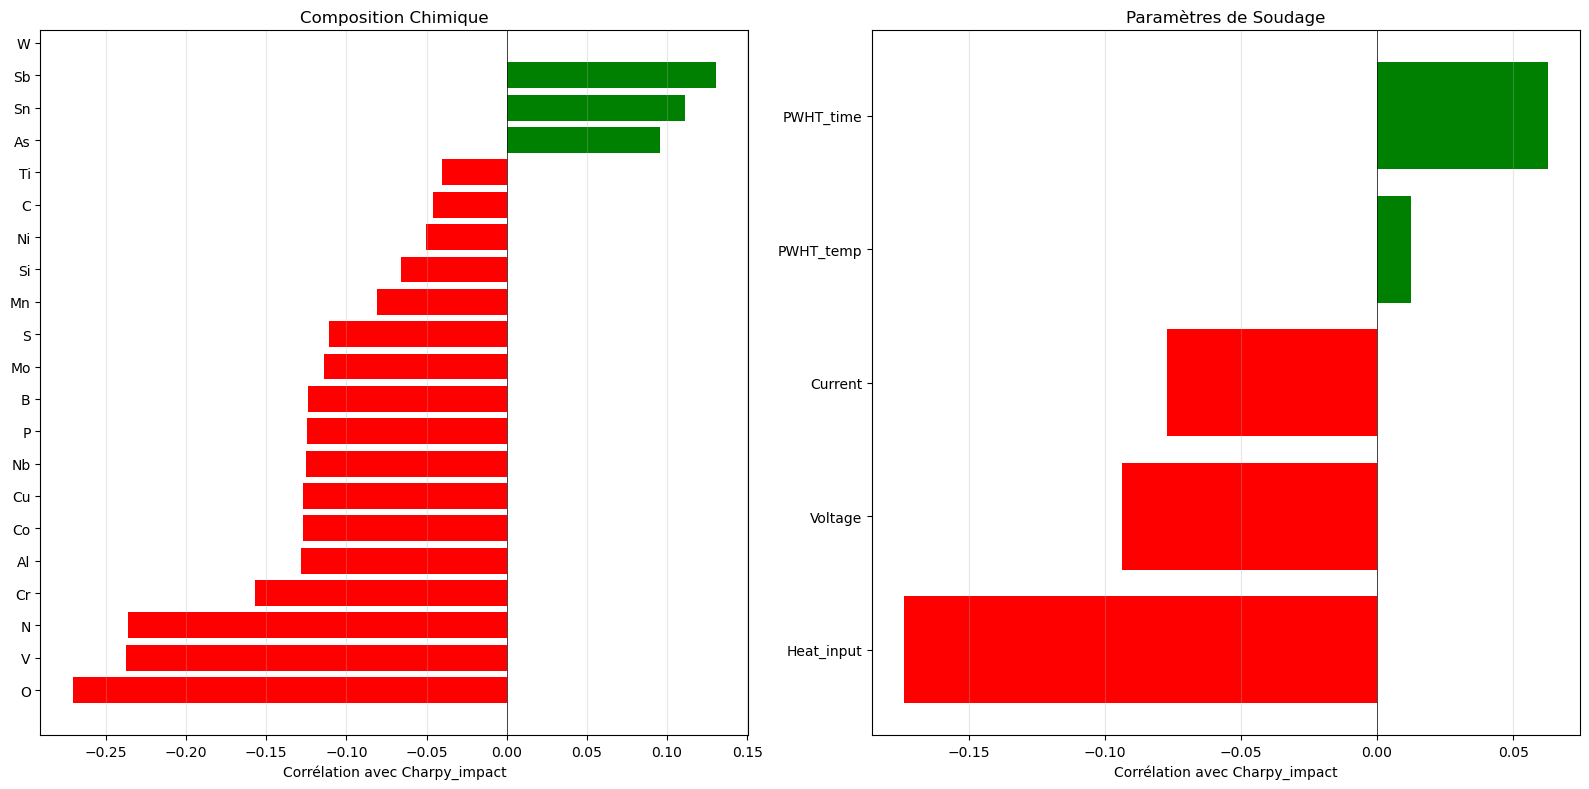

In [88]:
# Visualisation : Corrélations avec la qualité
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Graphique 1 : Composition chimique
comp_corr_sorted = comp_corr.sort_values()
colors_comp = ['red' if x < 0 else 'green' for x in comp_corr_sorted.values]
axes[0].barh(range(len(comp_corr_sorted)), comp_corr_sorted.values, color=colors_comp)
axes[0].set_yticks(range(len(comp_corr_sorted)))
axes[0].set_yticklabels(comp_corr_sorted.index)
axes[0].set_xlabel('Corrélation avec Charpy_impact')
axes[0].set_title('Composition Chimique')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3, axis='x')

# Graphique 2 : Paramètres de soudage
param_corr_sorted = param_corr.sort_values()
colors_param = ['red' if x < 0 else 'green' for x in param_corr_sorted.values]
axes[1].barh(range(len(param_corr_sorted)), param_corr_sorted.values, color=colors_param)
axes[1].set_yticks(range(len(param_corr_sorted)))
axes[1].set_yticklabels(param_corr_sorted.index)
axes[1].set_xlabel('Corrélation avec Charpy_impact')
axes[1].set_title('Paramètres de Soudage')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumsum_var = np.cumsum(pca.explained_variance_ratio_)

n_comp_80 = np.argmax(cumsum_var >= 0.80) + 1
n_comp_90 = np.argmax(cumsum_var >= 0.90) + 1
n_comp_95 = np.argmax(cumsum_var >= 0.95) + 1

print(f"Nombre de composants nécessaires:")
print(f"  • Pour 80% de variance: {n_comp_80} composants")
print(f"  • Pour 90% de variance: {n_comp_90} composants")
print(f"  • Pour 95% de variance: {n_comp_95} composants")
print(f"  • Réduction: {X_numeric.shape[1]} → {n_comp_90} features (90% de l'info conservée)")

# Afficher la variance des premiers composants
print(f"Variance expliquée par les 10 premiers composants:")
for i in range(min(10, len(pca.explained_variance_ratio_))):
    print(f"  • PC{i+1}: {pca.explained_variance_ratio_[i]:.2%} (cumul: {cumsum_var[i]:.2%})")

Nombre de composants nécessaires:
  • Pour 80% de variance: 9 composants
  • Pour 90% de variance: 12 composants
  • Pour 95% de variance: 15 composants
  • Réduction: 26 → 12 features (90% de l'info conservée)
Variance expliquée par les 10 premiers composants:
  • PC1: 21.89% (cumul: 21.89%)
  • PC2: 14.93% (cumul: 36.82%)
  • PC3: 11.98% (cumul: 48.80%)
  • PC4: 8.37% (cumul: 57.16%)
  • PC5: 7.27% (cumul: 64.44%)
  • PC6: 5.34% (cumul: 69.78%)
  • PC7: 4.77% (cumul: 74.55%)
  • PC8: 4.41% (cumul: 78.96%)
  • PC9: 4.22% (cumul: 83.18%)
  • PC10: 3.02% (cumul: 86.20%)


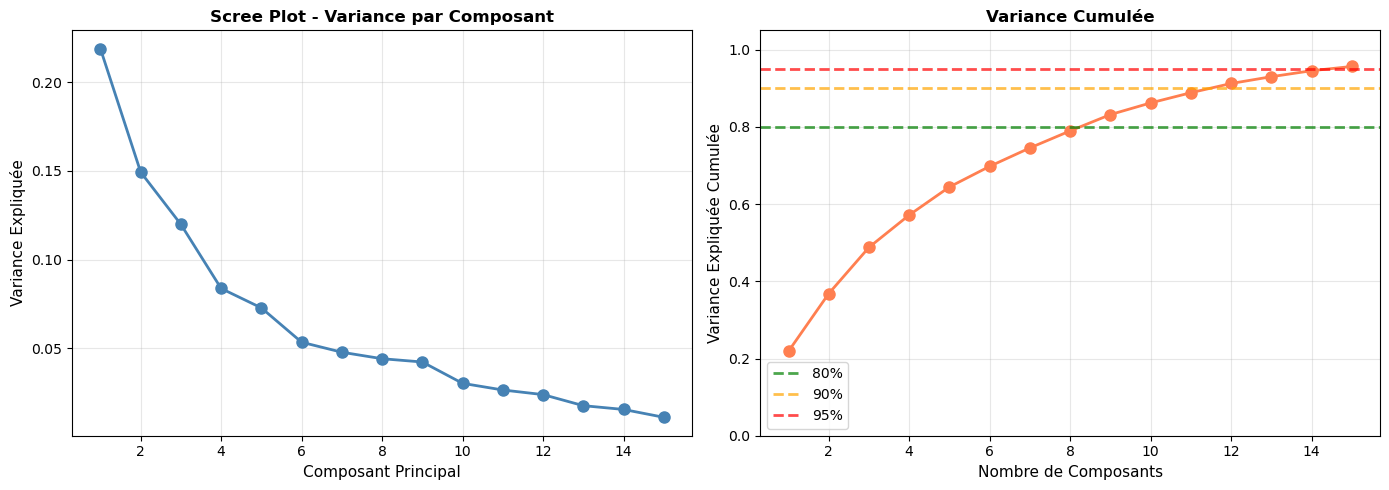

In [90]:
# Visualisation PCA : Scree plot et variance cumulée
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].plot(range(1, min(16, len(pca.explained_variance_ratio_)+1)), 
             pca.explained_variance_ratio_[:15], 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Composant Principal', fontsize=11)
axes[0].set_ylabel('Variance Expliquée', fontsize=11)
axes[0].set_title('Scree Plot - Variance par Composant', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Variance cumulée
axes[1].plot(range(1, min(16, len(cumsum_var)+1)), cumsum_var[:15], 'o-', linewidth=2, markersize=8, color='coral')
axes[1].axhline(y=0.80, color='green', linestyle='--', linewidth=2, label='80%', alpha=0.7)
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90%', alpha=0.7)
axes[1].axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95%', alpha=0.7)
axes[1].set_xlabel('Nombre de Composants', fontsize=11)
axes[1].set_ylabel('Variance Expliquée Cumulée', fontsize=11)
axes[1].set_title('Variance Cumulée', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

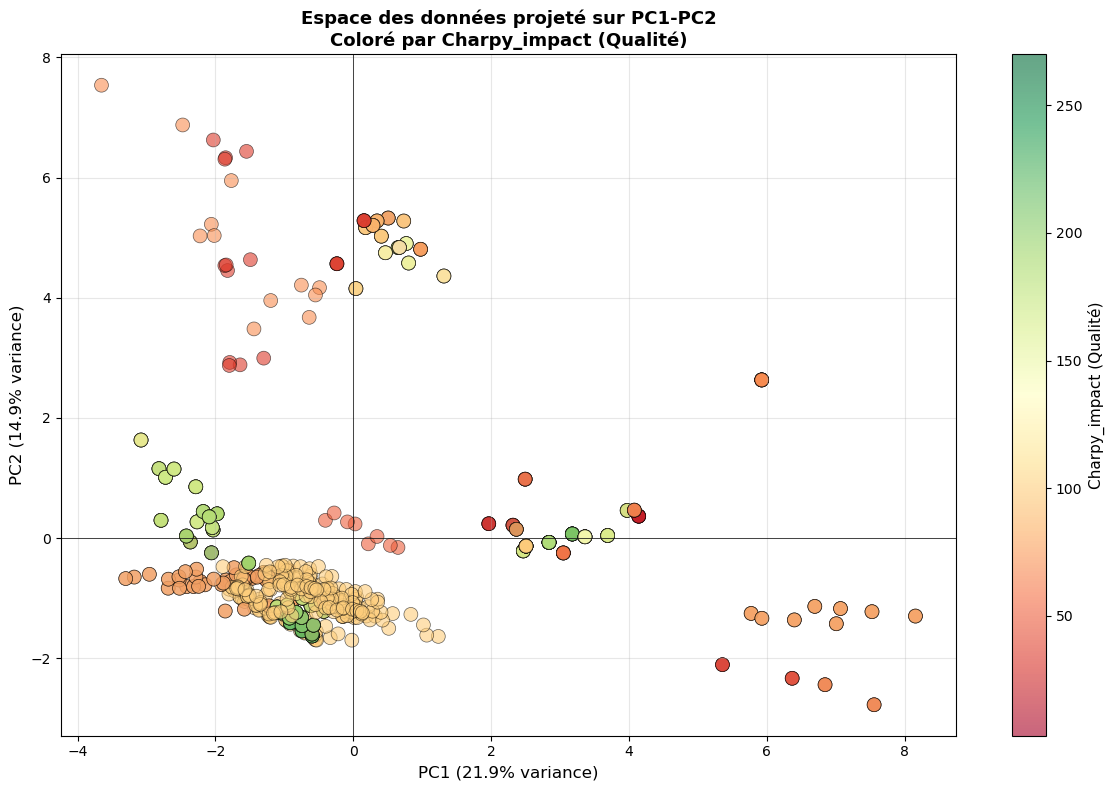

In [91]:
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y_complete.values.ravel(), 
                     cmap='RdYlGn', 
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
ax.set_title('Espace des données projeté sur PC1-PC2\nColoré par Charpy_impact (Qualité)', 
             fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Charpy_impact (Qualité)', fontsize=11)

plt.tight_layout()
plt.show()


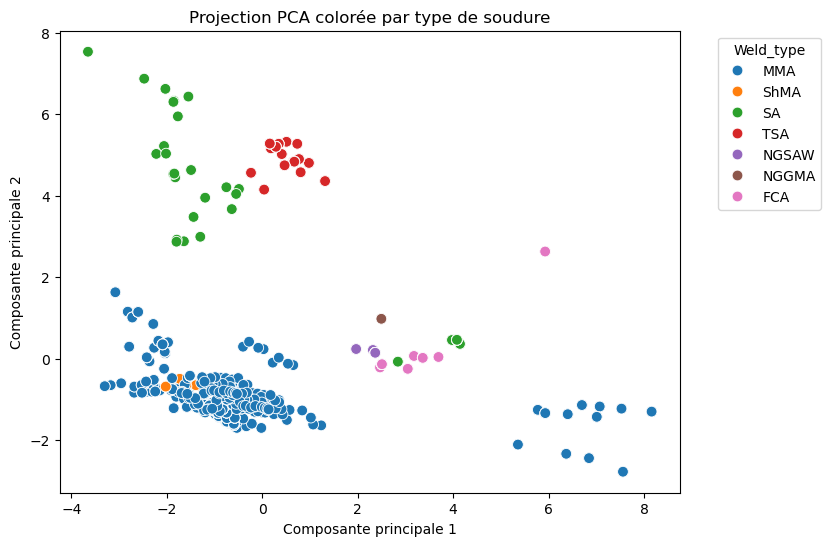

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


weld_hue = X_complete.loc[X_numeric.index, 'Weld_type']


plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=weld_hue,
    palette='tab10',
    s=60
)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection PCA colorée par type de soudure')
plt.legend(title='Weld_type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Conclusion de l'analyse

L’analyse exploratoire a permis de comprendre la structure et les leviers influençant la qualité des soudures.
Après un nettoyage rigoureux, les données chimiques et de procédé ont été combinées pour explorer leurs effets sur la ténacité.
Les corrélations montrent que la composition seule explique peu la variabilité, tandis que les paramètres thermiques (Heat_input, Interpass_temp, PWHT_temp) ont un impact bien plus marqué.
La PCA met en évidence deux axes majeurs : un axe “chimique” (Ni, Cr, Mo) et un axe “procédé” (apport thermique et conditions de soudage).
Les soudures se regroupent partiellement selon leur type (Weld_type) et la ténacité suit un gradient visible dans l’espace PCA.
En conclusion, la qualité d’une soudure résulte d’une interaction forte entre composition et procédé, ce qui justifie l’emploi futur de modèles non linéaires pour mieux prédire les performances mécaniques.